# Filtering for entries with Humboldt County

Humboldt County has the most obligations in the dataset, prompting us to wonder what types of obligations are going to this county.

In [1]:
import pandas as pd
from siuba import _, mutate, count, filter, group_by, ungroup, summarize, show_query, arrange, collect

import numpy as np
from sqlalchemy import create_engine
from siuba.sql import LazyTbl

In [2]:
#! pip install plotnine

In [3]:
from plotnine import *

In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [9]:
df = pd.read_csv('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/clean_obligated_waiting.csv', low_memory=False).drop('Unnamed: 0', axis=1)

In [10]:
df.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,8,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True


In [17]:
df.drop_duplicates(inplace=True)

In [11]:
cols = ['prepared_date','to_fmis_date','submit_to_fhwa_date','submit__to_hq_date','hq_review_date','date_request_initiated','date_completed_request']
df[cols] = df[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))

In [12]:
df.agency.value_counts().sort_values(ascending=False)

Humboldt County                                           631
Los Angeles                                               543
Fresno                                                    467
Santa Cruz County                                         455
Los Angeles County                                        411
                                                         ... 
Port Hueneme                                                1
Humboldt Bay Harbor Recreation & Conservation District      1
Fresno County Rural Transit Agency                          1
Santa Fe Sprgs                                              1
Ala-Con Costa T                                             1
Name: agency, Length: 671, dtype: int64

In [18]:
df >> filter(_.agency.str.contains("Humboldt County"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121,True
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20185,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False
20186,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False
20187,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaT,NaT,NaT,0.00,9154.33,10340.38,..,5904,1,Prepared on 9/29/2021,37.00,NaN,NaN,NaN,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,NaN,32L0,326,False
20190,HQ,ER,4400(046),Humboldt County,2021-09-09,2021-10-13,NaT,NaT,NaT,131198.09,0.00,148196.20,..,5904,1,Prepared on 9/9/2021,43.00,NaN,NaN,NaN,Alderpoint Road Pm 40.21 To 40.70,Emergency Relief Pr Only,4,2021-08-31,2021-09-09,NON-MPO,NaN,4400,46,False


In [19]:
df_hc = df >> filter(_.agency.str.contains("Humboldt County"))

In [20]:
df_hc['prepared_y_m'] = pd.to_datetime(df_hc["prepared_date"].dt.strftime('%Y-%m'))

/tmp/ipykernel_208/721848220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
df_hc['prepared_y'] = pd.to_datetime(df_hc["prepared_date"].dt.strftime('%Y'))

/tmp/ipykernel_208/1126982653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
print(len(df_hc))

627


In [23]:
df_hc >> count(_.locode) >> arrange(-_.n)

,locode,n
0,5904,627


In [24]:
df_hc >> count(_.compare_id_locode)

,compare_id_locode,n
0,False,474
1,True,153


### What Prefix Codes are fequently used?

In [25]:
df_hc >> count(_.prefix) >> arrange(-_.n)

,prefix,n
9,ER,379
0,ACST-ER,64
4,BPMPL,50
1,ACSTP,31
5,BRLO,22
7,BRLS,20
12,HSIP,19
13,RPSTP,18
6,BRLOZB,9
2,ATP,5


In [26]:
# ER funds, or emergency relief funds, are the most obligated type of funding to the county.

In [36]:
df_hc >> filter(_.prefix=='ER')>> summarize(avgfunds= _.total_requested.sum())

,avgfunds
0,9841663.19


#### What Project IDs occur the most?

In [37]:
df_hc >> group_by(_.prefix) >> count(_.projectID) >> arrange(-_.n)


,prefix,projectID,n
13,ER,32L0,171
11,ER,20A0,117
0,ACST-ER,32L0,62
15,ER,4400,51
6,BPMPL,5904,50
16,ER,4820,31
7,BRLO,5904,22
9,BRLS,5904,20
19,HSIP,5904,19
20,RPSTP,5904,18


In [38]:
df_hc >> group_by(_.prefix) >> count(_.project_no) >> arrange(-_.n)


,prefix,project_no,n
89,BRLO,5904(126),7
98,BRLS,5904(127),7
88,BRLO,5904(113),6
277,HSIP,5904(160),6
280,RPSTP,5904(106),6
...,...,...,...
255,ER,4400(071),1
259,ER,4820(007),1
264,ER,4820(017),1
272,FBDLNI,5904(130),1


In [21]:
# interesting that when we group by the 7-digit project numberm, the top is no longer ER. 

In [39]:
df_hc >> filter(_.prefix=='BRLO', _.project_no=='5904(126)') 


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2512,Obligated,BRLO,5904(126),Humboldt County,2017-11-08,2018-02-06,2018-02-09,2018-02-09,2018-02-15,346000.00,0.00,346000.00,Authorized,5904,1,E-76 approved on,92.00,3.00,6.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),6,2017-11-06,2017-11-06,NON-MPO,NaN,5904,126,True,2017-11-01,2017-01-01
4407,Obligated,BRLO,5904(126),Humboldt County,2017-04-27,2017-05-10,2017-05-11,2017-05-15,2017-05-16,505000.00,0.00,505000.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,13.00,5.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),5,NaT,NaT,NON-MPO,NaN,5904,126,True,2017-04-01,2017-01-01
4866,Obligated,BRLO,5904(126),Humboldt County,2016-10-31,2017-03-03,2017-03-06,2017-03-06,2017-03-07,130000.00,0.00,130000.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,123.00,3.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),4,NaT,NaT,NON-MPO,NaN,5904,126,True,2016-10-01,2016-01-01
9958,Obligated,BRLO,5904(126),Humboldt County,2015-02-02,2015-02-03,2015-02-04,2015-02-04,2015-02-04,109000.00,0.00,109000.00,Authorized,5904,1,E-76 approved on E-76 approved on,1.00,1.00,0.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),3,NaT,NaT,NON-MPO,NaN,5904,126,True,2015-02-01,2015-01-01
11835,Obligated,BRLO,5904(126),Humboldt County,2014-05-23,2014-05-23,2014-05-29,2014-05-29,2014-05-30,-109000.00,0.00,-109000.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,6.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),2,NaT,NaT,NON-MPO,NaN,5904,126,True,2014-05-01,2014-01-01
13127,Obligated,BRLO,5904(126),Humboldt County,2019-03-20,2019-04-02,2019-04-11,2019-04-12,2019-04-15,108577.00,0.00,108577.00,Authorized,5904,1,E-76 approved on,14.00,10.00,3.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),7,2019-03-19,2019-03-27,NON-MPO,NaN,5904,126,True,2019-03-01,2019-01-01
15629,Obligated,BRLO,5904(126),Humboldt County,2020-01-22,2020-01-22,2020-01-30,2020-01-30,2020-01-31,-21691.16,0.00,-21691.16,Authorized,5904,1,E-76 approved on,6.00,8.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),8,2020-01-16,2020-01-17,NON-MPO,NaN,5904,126,True,2020-01-01,2020-01-01


##### Using funds from two sources for the same location

In [40]:
#trying something here 
(df_hc
     >> filter(_.project_location.str.contains("Jacoby Creek"))
     >> count(_.project_no)
)

,project_no,n
0,5904(126),7
1,5904(165),2


In [41]:
df_hc >> filter(_.project_location.str.contains("Jacoby Creek"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
941,Obligated,BRLO,5904(165),Humboldt County,2018-07-03,2018-07-06,2018-07-10,2018-07-10,2018-07-19,22655.00,0.00,22655.00,Authorized,5904,1,E-76 approved on,65.00,4.00,9.00,HBPLOCAL,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,1,2018-05-02,2018-05-02,NON-MPO,NaN,5904,165,True,2018-07-01,2018-01-01
2512,Obligated,BRLO,5904(126),Humboldt County,2017-11-08,2018-02-06,2018-02-09,2018-02-09,2018-02-15,346000.00,0.00,346000.00,Authorized,5904,1,E-76 approved on,92.00,3.00,6.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),6,2017-11-06,2017-11-06,NON-MPO,NaN,5904,126,True,2017-11-01,2017-01-01
4407,Obligated,BRLO,5904(126),Humboldt County,2017-04-27,2017-05-10,2017-05-11,2017-05-15,2017-05-16,505000.00,0.00,505000.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,13.00,5.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),5,NaT,NaT,NON-MPO,NaN,5904,126,True,2017-04-01,2017-01-01
4866,Obligated,BRLO,5904(126),Humboldt County,2016-10-31,2017-03-03,2017-03-06,2017-03-06,2017-03-07,130000.00,0.00,130000.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,123.00,3.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),4,NaT,NaT,NON-MPO,NaN,5904,126,True,2016-10-01,2016-01-01
9958,Obligated,BRLO,5904(126),Humboldt County,2015-02-02,2015-02-03,2015-02-04,2015-02-04,2015-02-04,109000.00,0.00,109000.00,Authorized,5904,1,E-76 approved on E-76 approved on,1.00,1.00,0.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),3,NaT,NaT,NON-MPO,NaN,5904,126,True,2015-02-01,2015-01-01
11835,Obligated,BRLO,5904(126),Humboldt County,2014-05-23,2014-05-23,2014-05-29,2014-05-29,2014-05-30,-109000.00,0.00,-109000.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,6.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),2,NaT,NaT,NON-MPO,NaN,5904,126,True,2014-05-01,2014-01-01
13127,Obligated,BRLO,5904(126),Humboldt County,2019-03-20,2019-04-02,2019-04-11,2019-04-12,2019-04-15,108577.00,0.00,108577.00,Authorized,5904,1,E-76 approved on,14.00,10.00,3.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),7,2019-03-19,2019-03-27,NON-MPO,NaN,5904,126,True,2019-03-01,2019-01-01
15629,Obligated,BRLO,5904(126),Humboldt County,2020-01-22,2020-01-22,2020-01-30,2020-01-30,2020-01-31,-21691.16,0.00,-21691.16,Authorized,5904,1,E-76 approved on,6.00,8.00,1.00,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),8,2020-01-16,2020-01-17,NON-MPO,NaN,5904,126,True,2020-01-01,2020-01-01
20022,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaN,5904,165,True,2021-09-01,2021-01-01


In [47]:
(df_hc >> filter(_.project_location.str.contains("Jacoby Creek")) 
     >> group_by(_.project_no)
     >> count(_.prepared_y_m)
     >> arrange(_.prepared_y_m)
)

,project_no,prepared_y_m,n
0,5904(126),2014-05-01,1
1,5904(126),2015-02-01,1
2,5904(126),2016-10-01,1
3,5904(126),2017-04-01,1
4,5904(126),2017-11-01,1
7,5904(165),2018-07-01,1
5,5904(126),2019-03-01,1
6,5904(126),2020-01-01,1
8,5904(165),2021-09-01,1


In [25]:
## we have two project numbers for the same bridge, with different funds around the same time

In [49]:
df_hc >> filter(_.prefix=='BRLS', _.project_no=='5904(127)') 


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2983,Obligated,BRLS,5904(127),Humboldt County,2017-07-13,2017-11-13,2017-11-20,2017-11-21,2017-11-30,2180287.00,0.00,2480528.00,Authorized,5904,1,E-76 approved on,89.00,8.00,9.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,5,2017-02-24,2017-08-16,NON-MPO,NaN,5904,127,True,2017-07-01,2017-01-01
6674,Obligated,BRLS,5904(127),Humboldt County,2016-05-17,2016-05-25,2016-05-26,2016-05-26,2016-06-02,138992.00,0.00,157000.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,8.00,1.00,7.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,4,NaT,NaT,NON-MPO,NaN,5904,127,True,2016-05-01,2016-01-01
8726,Obligated,BRLS,5904(127),Humboldt County,2015-07-13,2015-07-13,2015-07-14,2015-07-14,2015-07-15,17706.00,0.00,20000.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,1.00,1.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,3,NaT,NaT,NON-MPO,NaN,5904,127,True,2015-07-01,2015-01-01
9950,Obligated,BRLS,5904(127),Humboldt County,2015-02-02,2015-02-04,2015-02-05,2015-02-05,2015-02-05,203619.00,0.00,230000.00,Authorized,5904,1,E-76 approved on E-76 approved on,2.00,1.00,0.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,2,NaT,NaT,NON-MPO,NaN,5904,127,True,2015-02-01,2015-01-01
13123,Obligated,BRLS,5904(127),Humboldt County,2019-03-12,2019-04-02,2019-04-12,2019-04-15,2019-04-16,192163.00,0.00,222715.00,Authorized,5904,1,E-76 approved on,27.00,13.00,1.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,6,2019-03-06,2019-03-11,NON-MPO,NaN,5904,127,True,2019-03-01,2019-01-01
18498,Obligated,BRLS,5904(127),Humboldt County,2021-02-10,2021-02-10,2021-02-18,2021-02-25,2021-03-02,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,1.00,15.00,5.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,7,2021-02-09,2021-02-10,NON-MPO,NaN,5904,127,True,2021-02-01,2021-01-01
19249,Obligated,BRLS,5904(127),Humboldt County,2021-04-29,2021-05-19,2021-05-28,2021-06-01,2021-06-15,-48480.20,0.00,-46125.83,Authorized,5904,1,E-76 approved on,264.00,13.00,14.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,8,2020-08-28,2021-05-18,NON-MPO,NaN,5904,127,True,2021-04-01,2021-01-01


In [53]:
#trying this again with Williams Creek
(df_hc
     >> filter(_.project_location.str.contains("Williams Creek"))
     >> group_by(_.prefix, _.project_no, _.prepared_y)
     >> count(_.project_no)
)

,prefix,project_no,prepared_y,n
0,BRLOZB,5904(032),2015-01-01,1
1,BRLOZB,5904(032),2016-01-01,1
2,BRLOZB,5904(032),2017-01-01,2
3,BRLS,5904(127),2015-01-01,2
4,BRLS,5904(127),2016-01-01,1
5,BRLS,5904(127),2017-01-01,1
6,BRLS,5904(127),2019-01-01,1
7,BRLS,5904(127),2021-01-01,2
8,BRLS,5904(164),2018-01-01,1
9,BRLS,5904(164),2021-01-01,1


In [54]:
df_hc >> filter(_.project_location.str.contains("Williams Creek"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
557,Obligated,BRLS,5904(164),Humboldt County,2018-07-26,2018-07-26,2018-09-11,2018-09-12,2018-09-16,47480.00,0.00,53632.00,Authorized,5904,1,E-76 approved on,0.00,48.00,4.00,230-0000-0031,Williams Creek Bridge At Grizzly Bluff Road,Revegetation Mitigation Monitoring,1,2018-05-29,2018-07-26,NON-MPO,NaN,5904,164,True,2018-07-01,2018-01-01
2983,Obligated,BRLS,5904(127),Humboldt County,2017-07-13,2017-11-13,2017-11-20,2017-11-21,2017-11-30,2180287.00,0.00,2480528.00,Authorized,5904,1,E-76 approved on,89.00,8.00,9.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,5,2017-02-24,2017-08-16,NON-MPO,NaN,5904,127,True,2017-07-01,2017-01-01
3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,11.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),11,NaT,NaT,NON-MPO,NaN,5904,32,True,2017-07-01,2017-01-01
4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,0.00,0.00,8.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),10,NaT,NaT,NON-MPO,NaN,5904,32,True,2017-05-01,2017-01-01
6674,Obligated,BRLS,5904(127),Humboldt County,2016-05-17,2016-05-25,2016-05-26,2016-05-26,2016-06-02,138992.00,0.00,157000.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,8.00,1.00,7.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,4,NaT,NaT,NON-MPO,NaN,5904,127,True,2016-05-01,2016-01-01
7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,2.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),9,NaT,NaT,NON-MPO,NaN,5904,32,True,2016-01-01,2016-01-01
8726,Obligated,BRLS,5904(127),Humboldt County,2015-07-13,2015-07-13,2015-07-14,2015-07-14,2015-07-15,17706.00,0.00,20000.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,1.00,1.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,3,NaT,NaT,NON-MPO,NaN,5904,127,True,2015-07-01,2015-01-01
9102,Obligated,BRLOZB,5904(032),Humboldt County,2015-05-04,2015-05-21,2015-06-08,2015-06-08,2015-06-09,115438.30,0.00,130022.46,Authorized,5904,1,E-76 approved on E-76 approved on,17.00,18.00,1.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),8,NaT,NaT,NON-MPO,NaN,5904,32,True,2015-05-01,2015-01-01
9950,Obligated,BRLS,5904(127),Humboldt County,2015-02-02,2015-02-04,2015-02-05,2015-02-05,2015-02-05,203619.00,0.00,230000.00,Authorized,5904,1,E-76 approved on E-76 approved on,2.00,1.00,0.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,2,NaT,NaT,NON-MPO,NaN,5904,127,True,2015-02-01,2015-01-01
13123,Obligated,BRLS,5904(127),Humboldt County,2019-03-12,2019-04-02,2019-04-12,2019-04-15,2019-04-16,192163.00,0.00,222715.00,Authorized,5904,1,E-76 approved on,27.00,13.00,1.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,6,2019-03-06,2019-03-11,NON-MPO,NaN,5904,127,True,2019-03-01,2019-01-01


In [52]:
#interesting. we have a bridge reconstruction going on with funds coming from two programs in the same timeframe 

### Looking into the Sequences

In [63]:
df_hc >> group_by(_.projectID, _.prefix) >> count(_.seq) >> arrange(-_.n)

,projectID,prefix,seq,n
14,32L0,ER,1,58
0,20A0,ER,2,49
16,32L0,ER,3,41
1,20A0,ER,3,38
7,32L0,ACST-ER,2,36
...,...,...,...,...
89,5904,RPSTP,1,1
93,5904,RPSTP,5,1
96,5904,RPSTP,8,1
97,5904,RPSTP,9,1


In [64]:
# making sure this query looks at the number of seq for each 7-digit project code

df_hc >> filter(_.prefix == "ER", _.project_no == "32L0(329)")


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
251,Obligated,ER,32L0(329),Humboldt County,2018-10-19,2018-10-19,2018-11-02,2018-11-06,2018-11-11,26293.41,0.00,29700.00,Authorized,5904,1,E-76 approved on,3.00,18.00,5.00,NaN,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,1,2018-10-16,2018-10-16,NON-MPO,NaN,32L0,329,False,2018-10-01,2018-01-01
16967,Obligated,ER,32L0(329),Humboldt County,2020-07-07,2020-07-21,2020-07-28,2020-08-03,2020-08-06,301505.73,0.00,340569.00,Authorized,5904,1,E-76 approved on,14.00,13.00,3.00,NaN,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,2,2020-07-07,2020-07-21,NON-MPO,NaN,32L0,329,False,2020-07-01,2020-01-01
17849,Obligated,ER,32L0(329),Humboldt County,2020-10-19,2020-10-19,2020-10-19,2020-12-24,2021-01-06,3355955.40,-3355955.40,0.00,Authorized,5904,1,E-76 approved on,0.00,66.00,13.00,NaN,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,4,2020-10-19,2020-10-19,NON-MPO,NaN,32L0,329,False,2020-10-01,2020-01-01


In [66]:
# There was a double entry here before removing duplicates. 

In [67]:
df_hc >> count(_.mpo)

,mpo,n
0,NON-MPO,627


In [68]:
df_hc >> filter(_.seq >= 9) >> arrange(_.project_no)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
5280,Obligated,BRLSZD,5904(006),Humboldt County,2016-12-08,2016-12-08,2016-12-08,2016-12-08,2016-12-14,-228.08,0.00,9753.05,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,6.00,NON-MPO,"Bald Hills Rd At Klamath River, Martin's Ferry...",Bridge Retrofit / Rehabilitation,13,NaT,NaT,NON-MPO,NaN,5904,6,True,2016-12-01,2016-01-01
9844,Obligated,BRLSZD,5904(006),Humboldt County,2014-05-30,2015-02-04,2015-02-05,2015-02-20,2015-02-20,-27390.06,0.00,-28046.40,Authorized,5904,1,E-76 approved on E-76 approved on,250.00,16.00,0.00,NON-MPO,"Bald Hills Rd At Klamath River, Martin's Ferry...",Bridge Retrofit / Rehabilitation,12,NaT,NaT,NON-MPO,NaN,5904,6,True,2014-05-01,2014-01-01
3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,11.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),11,NaT,NaT,NON-MPO,NaN,5904,32,True,2017-07-01,2017-01-01
4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,0.00,0.00,8.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),10,NaT,NaT,NON-MPO,NaN,5904,32,True,2017-05-01,2017-01-01
7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,2.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),9,NaT,NaT,NON-MPO,NaN,5904,32,True,2016-01-01,2016-01-01
5412,Obligated,RPSTP,5904(106),Humboldt County,2016-11-17,2016-11-17,2016-11-17,2016-11-17,2016-11-18,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,1.00,NaN,School Rd From Fischer Rd To Salmon Ave In Mck...,Construct Sidewalks And Bike Lanes (tc),9,NaT,NaT,NON-MPO,NaN,5904,106,True,2016-11-01,2016-01-01


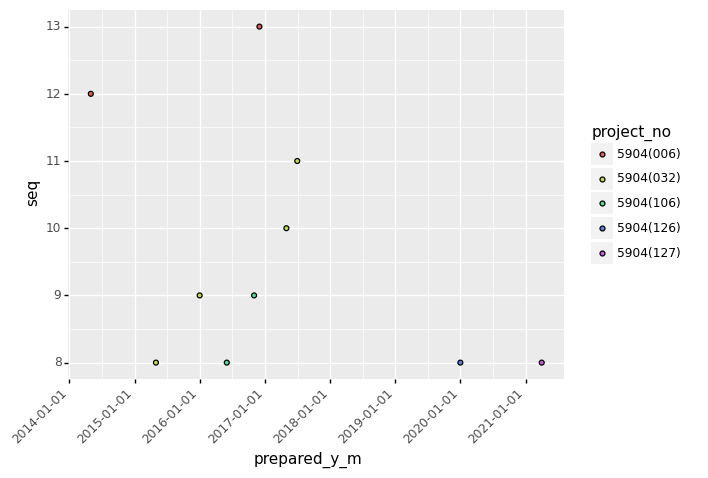

<ggplot: (8768499747057)>

In [69]:
#curious to see where/when the sequences fall on a timeline for different projects
(
    df_hc 
    >> filter(_.seq >= 8) 
    >> group_by(_.project_no)
    >> ggplot(aes("prepared_y_m", "seq", fill="project_no")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    
)

### ER Funds

In [70]:
df_hc >> filter(_.prefix == "ER")

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False,2018-12-01,2018-01-01
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-11-01,2018-01-01
181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,0.00,12442.17,Authorized,5904,1,E-76 approved on,3.00,2.00,7.00,NaN,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,NaN,32L0,138,False,2018-11-01,2018-01-01
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-11-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-08-01,2021-01-01
20185,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-08-01,2021-01-01
20186,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False,2021-08-01,2021-01-01
20187,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaT,NaT,NaT,0.00,9154.33,10340.38,..,5904,1,Prepared on 9/29/2021,37.00,NaN,NaN,NaN,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,NaN,32L0,326,False,2021-09-01,2021-01-01


#### Using ER funds for Mattole Road 

In [72]:
#just saw "Mattole Road" on the first entry. Searching using this string. 
df_hc >> filter(_.project_location.str.contains("Mattole R"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False,2018-12-01,2018-01-01
61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True,2018-11-01,2018-01-01
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-11-01,2018-01-01
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-11-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,Obligated,ACST-ER,32L0(111),Humboldt County,2021-05-13,2021-05-13,2021-05-26,2021-06-08,2021-06-15,0.00,55684.81,62899.38,Authorized,5904,1,E-76 approved on,28.00,26.00,7.00,NaN,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",5,2021-04-15,2021-04-15,NON-MPO,NaN,32L0,111,False,2021-05-01,2021-01-01
19831,Obligated,ER,32L0(250),Humboldt County,2021-07-23,2021-08-16,2021-08-24,2021-09-23,2021-09-27,-13744.37,0.00,-15525.09,Authorized,5904,1,E-76 approved on,28.00,38.00,4.00,NaN,Mattole Road Pm 11.05-11.29,Permanent Restoration,4,2021-07-19,2021-08-16,NON-MPO,NaN,32L0,250,False,2021-07-01,2021-01-01
20184,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-08-01,2021-01-01
20185,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-08-01,2021-01-01


In [73]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> count(_.prefix))

,prefix,n
0,ACST-ER,24
1,ACSTP,7
2,BPMPL,3
3,BRLS,2
4,ER,122


In [75]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> group_by(_.prefix, _.prepared_y)
     >> count(_.project_no)
     >> arrange(-_.n)
)

,prefix,prepared_y,project_no,n
115,ER,2020-01-01,4400(017),3
39,ER,2015-01-01,20A0(041),2
42,ER,2015-01-01,20A0(050),2
43,ER,2015-01-01,4400(061),2
44,ER,2015-01-01,4820(003),2
...,...,...,...,...
119,ER,2021-01-01,32L0(253),1
120,ER,2021-01-01,32L0(319),1
121,ER,2021-01-01,32L0(320),1
122,ER,2021-01-01,32L0(321),1


In [81]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> group_by(_.prepared_y, _.prefix)
     >> count(_.type_of_work)
     >> arrange(-_.n)
)

,prepared_y,prefix,type_of_work,n
21,2018-01-01,ER,Storm Damage Restoration,26
38,2019-01-01,ER,Permanent Restoration,18
19,2018-01-01,ER,Permanent Restoration,15
28,2019-01-01,ACST-ER,Permanent Restoration,9
3,2015-01-01,ER,Emergency Opening,6
...,...,...,...,...
58,2021-01-01,ACST-ER,"Grind Existing Roadway, Recompact/augment Road...",1
60,2021-01-01,ACST-ER,Stabilize Roadway With Earth Retaining Structu...,1
61,2021-01-01,ACSTP,Permanent Restoration,1
62,2021-01-01,BRLS,Bridge Replacement (br # 04c0055),1


#### ER project numbers

In [82]:
df_hc >> filter(_.prefix=="ER") >> count(_.projectID) >> arrange(-_.n)

,projectID,n
2,32L0,171
0,20A0,117
4,4400,51
5,4820,31
3,40A0,6
1,28L4,3


In [83]:
df_hc >> filter(_.prefix == "ER") >> count(_.project_no) >> arrange(-_.n)

,project_no,n
63,32L0(121),4
70,32L0(132),4
89,32L0(234),4
90,32L0(235),4
99,32L0(270),4
...,...,...
134,4400(020),1
152,4400(062),1
153,4400(071),1
157,4820(007),1


### What projects are grouped by date

In [84]:
df_hc.sample(3)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
9049,Obligated,BPMPL,5904(118),Humboldt County,2015-06-10,2015-06-10,2015-06-10,2015-06-11,2015-06-11,-208203.00,0.00,-235178.00,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,1.00,0.00,HBPLOCAL,Maple Creek Bridge And Honeydew Bridge,Bridge Preventative Maintenance,2,NaT,NaT,NON-MPO,NaN,5904,118,True,2015-06-01,2015-01-01
14872,Obligated,ER,32L0(185),Humboldt County,2019-09-16,2019-09-17,2019-10-04,2019-10-04,2019-10-10,362.49,0.00,1295.14,Authorized,5904,1,E-76 approved on,3.00,17.00,6.00,NaN,Kneeland Road Pm 34.96,Emergency Opening,2,2019-09-14,2019-09-14,NON-MPO,NaN,32L0,185,False,2019-09-01,2019-01-01
16673,Obligated,ER,32L0(230),Humboldt County,2020-05-07,2020-05-15,2020-05-29,2020-06-08,2020-06-11,138290.24,0.00,156207.20,Authorized,5904,1,E-76 approved on,15.00,24.00,3.00,NaN,Humboldt Co On Herrick Avenue Pm 0.74,Permanent Restoration,6,2020-04-30,2020-05-15,NON-MPO,NaN,32L0,230,False,2020-05-01,2020-01-01


In [118]:
(df_hc
    >> count(_.prepared_date) 
    >> arrange(-_.n)
    >> filter(_.n >= 5)
)

,prepared_date,n
119,2018-03-22,17
120,2018-03-29,16
10,2014-05-22,13
209,2019-09-04,10
141,2018-07-30,9
231,2019-11-04,9
117,2018-03-19,8
211,2019-09-06,8
112,2018-01-19,7
128,2018-06-18,7


#### March 22, 2018: 17 ER Entries

In [147]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.prefix)
    >> arrange(-_.n)
)

,prefix,n
0,ER,17


In [148]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
1767,Obligated,ER,4400(050),Humboldt County,2018-03-22,2018-03-22,2018-04-27,2018-04-27,2018-05-01,-899.76,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,36.00,4.00,SH_EMER,Alderpoint Road Pm 42.00 To 42.46,Emergency Relief,7,NaT,NaT,NON-MPO,NaN,4400,50,False,2018-03-01,2018-01-01
1840,Obligated,ER,20A0(053),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-20,-14591.10,0.00,-16482.54,Authorized,5904,1,E-76 approved on,2.00,17.00,11.00,NaN,"Mattole Road (bull Creek), Pm 3.55",Storm Damage Restoration,2,2018-03-21,2018-03-21,NON-MPO,NaN,20A0,53,False,2018-03-01,2018-01-01
1913,Obligated,ER,20A0(042),Humboldt County,2018-03-22,2018-03-23,2018-04-06,2018-04-06,2018-04-16,5183.44,0.00,5854.34,Authorized,5904,1,E-76 approved on,2.00,14.00,10.00,NaN,"Mattole Road, Pm 26.96",Storm Damage Restoration,2,2018-03-21,2018-03-21,NON-MPO,NaN,20A0,42,False,2018-03-01,2018-01-01
1914,Obligated,ER,20A0(048),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,-17213.28,0.00,-19443.93,Authorized,5904,1,E-76 approved on,2.00,17.00,7.00,NaN,"Mattole Road, Pm 36.98",Permanent Restoration,3,2018-03-21,2018-03-21,NON-MPO,NaN,20A0,48,False,2018-03-01,2018-01-01
1915,Obligated,ER,20A0(051),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,-17493.33,0.00,-19760.45,Authorized,5904,1,E-76 approved on,2.00,17.00,7.00,NaN,"Mattole Road, Pm 42.70",Permanent Restoration,3,2018-03-21,2018-03-21,NON-MPO,NaN,20A0,51,False,2018-03-01,2018-01-01
1917,Obligated,ER,20A0(017),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,-91981.36,0.00,-103073.49,Authorized,5904,1,E-76 approved on,2.00,17.00,7.00,NaN,"Alderpoint Road, Pm 36.98",Permanent Restoration,4,2018-03-21,2018-03-21,NON-MPO,NaN,20A0,17,False,2018-03-01,2018-01-01
1961,Obligated,ER,20A0(055),Humboldt County,2018-03-22,2018-03-23,2018-04-03,2018-04-03,2018-04-13,7261.19,0.00,8202.07,Authorized,5904,1,E-76 approved on,14.00,11.00,10.00,NaN,"Zenia Bluffs Road, Pm 1.20",Storm Damage Restoration,2,2018-03-09,2018-03-09,NON-MPO,NaN,20A0,55,False,2018-03-01,2018-01-01
2011,Obligated,ER,20A0(028),Humboldt County,2018-03-22,2018-03-23,2018-04-02,2018-04-02,2018-04-10,2645.20,0.00,2987.54,Authorized,5904,1,E-76 approved on,14.00,10.00,8.00,NaN,"Kneeland Road, Pm 0.26",Storm Damage Restoration,2,2018-03-09,2018-03-09,NON-MPO,NaN,20A0,28,False,2018-03-01,2018-01-01
2013,Obligated,ER,20A0(031),Humboldt County,2018-03-22,2018-03-23,2018-04-02,2018-04-02,2018-04-10,7602.62,0.00,8587.02,Authorized,5904,1,E-76 approved on,14.00,10.00,8.00,NaN,"Kneeland Road, Pm 6.45",Storm Damage Restoration,2,2018-03-09,2018-03-09,NON-MPO,NaN,20A0,31,False,2018-03-01,2018-01-01
2015,Obligated,ER,20A0(037),Humboldt County,2018-03-22,2018-03-23,2018-04-03,2018-04-03,2018-04-10,11398.21,0.00,12958.04,Authorized,5904,1,E-76 approved on,14.00,11.00,7.00,NaN,"Mattole Road, Pm 5.25",Storm Damage Restoration,2,2018-03-09,2018-03-09,NON-MPO,NaN,20A0,37,False,2018-03-01,2018-01-01


* Most of these are for Mattole Road, similar types of works, same phase, different sectiopns of the road

In [152]:
#checking to see if there were doubles in project location
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.project_location)
)

,project_location,n
0,Alderpoint Road Pm 42.00 To 42.46,1
1,"Alderpoint Road, Pm 36.98",1
2,"Kneeland Road, Pm 0.26",1
3,"Kneeland Road, Pm 6.45",1
4,"Mattole Road (bull Creek), Pm 3.55",1
5,"Mattole Road, Pm 13.67",1
6,"Mattole Road, Pm 17.83",1
7,"Mattole Road, Pm 2.11",1
8,"Mattole Road, Pm 26.96",1
9,"Mattole Road, Pm 27.10",1


In [153]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.type_of_work)
)

,type_of_work,n
0,Emergency Relief,1
1,Permanent Restoration,4
2,Storm Damage Restoration,12


In [126]:
(df_hc 
    >> group_by(_.prefix)
    >> count(_.prepared_y) 
    >> arrange(-_.n)
    >> filter(_.n > 5)
)

,prefix,prepared_y,n
48,ER,2018-01-01,146
49,ER,2019-01-01,82
50,ER,2020-01-01,47
0,ACST-ER,2019-01-01,39
45,ER,2015-01-01,31
44,ER,2014-01-01,30
51,ER,2021-01-01,26
1,ACST-ER,2020-01-01,13
2,ACST-ER,2021-01-01,12
5,ACSTP,2020-01-01,11


In [127]:
(df_hc 
    >> filter(_.prefix == "ACST-ER")
    >> count(_.prepared_y) 
    >> arrange(-_.n)
    >> filter(_.n > 1)
)

,prepared_y,n
0,2019-01-01,39
1,2020-01-01,13
2,2021-01-01,12


In [128]:
(df_hc 
    >> filter(_.prefix == "BPMPL")
    >> count(_.prepared_y) 
     >> arrange(-_.n)
     >> filter(_.n>1)
)

,prepared_y,n
2,2016-01-01,11
5,2019-01-01,7
7,2021-01-01,7
1,2015-01-01,6
4,2018-01-01,6
0,2014-01-01,5
3,2017-01-01,4
6,2020-01-01,4


In [129]:
(df_hc 
    >> filter(_.prefix == "ER")
    >> count(_.prepared_y_m) 
     >> arrange(-_.n)
     >> filter(_.n>5)
)

,prepared_y_m,n
27,2018-03-01,48
29,2018-06-01,41
35,2019-01-01,25
43,2019-11-01,25
42,2019-10-01,20
1,2014-05-01,18
32,2018-10-01,17
33,2018-11-01,13
30,2018-07-01,12
58,2021-04-01,12


In [130]:
(df_hc 
    >> filter(_.prefix == "ER", _.prepared_y_m == '2019-10-01')
    >> count(_.project_no)
)

,project_no,n
0,32L0(003),1
1,32L0(111),1
2,32L0(114),1
3,32L0(117),1
4,32L0(125),1
5,32L0(130),1
6,32L0(132),1
7,32L0(160),1
8,32L0(230),1
9,32L0(235),1


In [131]:
df_hc >> filter(_.prefix == "ER", _.prepared_y_m == '2019-10-01', _.project_no == '32L0(434)')


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
14874,Obligated,ER,32L0(434),Humboldt County,2019-10-03,2019-10-03,2019-10-07,2019-10-09,2019-10-15,4337.97,-4337.97,0.00,Authorized,5904,1,E-76 approved on,0.00,6.00,6.00,NaN,Sprowel Creek Rd Pm 0.90,Permanent Restoration,2,2019-10-03,2019-10-03,NON-MPO,NaN,32L0,434,False,2019-10-01,2019-01-01


In [132]:
## looking for more instances of this project code 
df_hc >> filter(_.prefix == "ER", _.project_no == '32L0(434)')

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
14874,Obligated,ER,32L0(434),Humboldt County,2019-10-03,2019-10-03,2019-10-07,2019-10-09,2019-10-15,4337.97,-4337.97,0.00,Authorized,5904,1,E-76 approved on,0.00,6.00,6.00,NaN,Sprowel Creek Rd Pm 0.90,Permanent Restoration,2,2019-10-03,2019-10-03,NON-MPO,NaN,32L0,434,False,2019-10-01,2019-01-01
15620,Obligated,ER,32L0(434),Humboldt County,2019-11-05,2019-11-05,2020-01-08,2020-01-16,2020-01-21,-4337.97,0.00,-4900.00,Authorized,5904,1,E-76 approved on,19.00,72.00,5.00,NaN,Sprowel Creek Rd Pm 0.90,Permanent Restoration,3,2019-10-17,2019-10-17,NON-MPO,NaN,32L0,434,False,2019-11-01,2019-01-01


In [133]:
(df_hc 
    >> filter(_.prefix == "ER")
    >> group_by(_.prepared_y_m)
)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False,2018-12-01,2018-01-01
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-11-01,2018-01-01
181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,0.00,12442.17,Authorized,5904,1,E-76 approved on,3.00,2.00,7.00,NaN,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,NaN,32L0,138,False,2018-11-01,2018-01-01
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-11-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-08-01,2021-01-01
20185,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-08-01,2021-01-01
20186,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False,2021-08-01,2021-01-01
20187,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaT,NaT,NaT,0.00,9154.33,10340.38,..,5904,1,Prepared on 9/29/2021,37.00,NaN,NaN,NaN,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,NaN,32L0,326,False,2021-09-01,2021-01-01


### Looking at Projects with 32L0


In [134]:
df_hc >> filter(_.projectID == "32L0")
             

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-11-01,2018-01-01
181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,0.00,12442.17,Authorized,5904,1,E-76 approved on,3.00,2.00,7.00,NaN,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,NaN,32L0,138,False,2018-11-01,2018-01-01
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-11-01,2018-01-01
183,Obligated,ER,32L0(219),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,13724.04,0.00,15502.14,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Murray Road Pm 5.57, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,219,False,2018-11-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20183,HQ,ER,32L0(282),Humboldt County,2021-08-16,2021-09-30,NaT,NaT,NaT,0.00,64581.35,72948.57,..,5904,1,Prepared on 8/16/2021,48.00,NaN,NaN,NaN,"Alderpoint Rd Pm 43.55, Humboldt County Ca",Permanent Restoration,4,2021-08-13,2021-08-16,NON-MPO,NaN,32L0,282,False,2021-08-01,2021-01-01
20184,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-08-01,2021-01-01
20185,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-08-01,2021-01-01
20186,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False,2021-08-01,2021-01-01


In [135]:
df_hc >> filter(_.projectID == "32L0", _.type_of_work.str.contains("Roadway"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-11-01,2018-01-01
1126,Obligated,ER,32L0(111),Humboldt County,2018-06-27,2018-06-27,2018-06-27,2018-06-27,2018-07-03,7657.84,-7657.84,0.00,Authorized,5904,1,E-76 approved on,0.00,0.00,6.00,NaN,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",2,2018-06-27,2018-06-27,NON-MPO,NaN,32L0,111,False,2018-06-01,2018-01-01
1130,Obligated,ER,32L0(127),Humboldt County,2018-06-25,2018-06-25,2018-06-28,2018-06-29,2018-07-03,23672.92,-23672.92,0.00,Authorized,5904,1,E-76 approved on,7.00,4.00,4.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,2,2018-06-18,2018-06-18,NON-MPO,NaN,32L0,127,False,2018-06-01,2018-01-01
2218,Obligated,ACSTP,32L0(127),Humboldt County,2018-01-19,2018-02-16,2018-03-06,2018-03-06,2018-03-16,0.00,23672.92,26740.00,Authorized,5904,1,E-76 approved on,42.00,18.00,10.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,1,2018-01-05,2018-01-05,NON-MPO,NaN,32L0,127,False,2018-01-01,2018-01-01
2245,Obligated,ACSTP,32L0(111),Humboldt County,2018-01-19,2018-02-16,2018-03-06,2018-03-06,2018-03-15,0.00,7657.84,8650.00,Authorized,5904,1,E-76 approved on,42.00,18.00,9.00,NaN,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",1,2018-01-05,2018-01-05,NON-MPO,NaN,32L0,111,False,2018-01-01,2018-01-01
13035,Obligated,ER,32L0(117),Humboldt County,2018-12-20,2018-12-21,2019-01-22,2019-02-25,2019-02-28,23929.65,0.00,27030.00,Authorized,5904,1,E-76 approved on,1.00,66.00,3.00,NaN,Mattole Road Pm 42.76,Stabilize Roadway With Earth Retaining Structu...,1,2018-12-20,2018-12-20,NON-MPO,NaN,32L0,117,False,2018-12-01,2018-01-01
13037,Obligated,ACSTP,32L0(128),Humboldt County,2019-03-12,2019-03-12,2019-05-10,2019-05-20,2019-05-22,0.00,98135.50,110850.00,Authorized,5904,1,E-76 approved on,1.00,69.00,2.00,NaN,Bell Spring Road Pm 4.96,Restoration Of Failing Roadway.,1,2019-03-11,2019-03-12,NON-MPO,NaN,32L0,128,False,2019-03-01,2019-01-01
13038,Obligated,ER,32L0(134),Humboldt County,2019-01-14,2019-01-14,2019-02-25,2019-03-04,2019-03-06,50649.91,0.00,50663.65,Authorized,5904,1,E-76 approved on,0.00,49.00,2.00,NaN,Mattole Road Pm. 42.76,"Eo By Agency, County And Contractor Repaired R...",1,2019-01-14,2019-01-14,NON-MPO,NaN,32L0,134,False,2019-01-01,2019-01-01
13043,Obligated,ER,32L0(173),Humboldt County,2019-01-31,2019-02-05,2019-03-19,2019-03-26,2019-03-27,8788.71,0.00,8788.71,Authorized,5904,1,E-76 approved on,5.00,49.00,1.00,NaN,Alderpoint Road Pm10.52 To Pm10.53,Storm Damage Repair Of Roadway Settlement,1,2019-01-31,2019-01-31,NON-MPO,NaN,32L0,173,False,2019-01-01,2019-01-01
13054,Obligated,ER,32L0(293),Humboldt County,2019-01-09,2019-01-10,2019-02-15,2019-02-15,2019-02-26,6781.39,0.00,7660.00,Authorized,5904,1,E-76 approved on,1.00,36.00,11.00,NaN,"Alderpoint Road, Pm 8.15",Saturated Base Causing Roadway & Shoulder Sett...,1,2019-01-09,2019-01-09,NON-MPO,NaN,32L0,293,False,2019-01-01,2019-01-01


In [136]:
df_hc_prefix_count = df_hc >> filter(_.projectID == "32L0") >> count(_.prefix) >> arrange(-_.n)

In [137]:
df_hc_prefix_count

,prefix,n
2,ER,171
0,ACST-ER,62
1,ACSTP,15


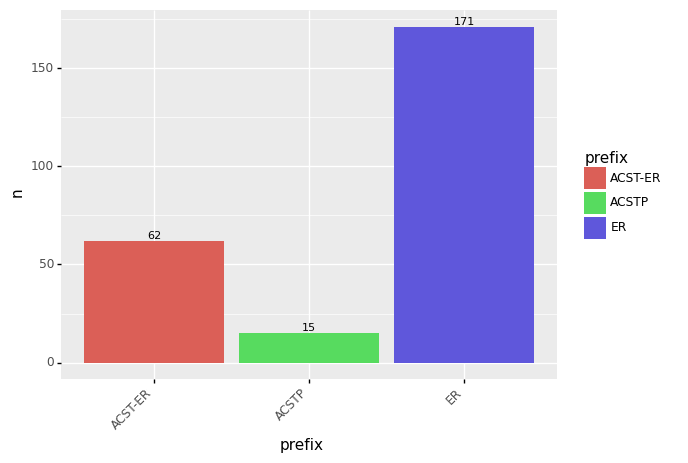

<ggplot: (8768499565168)>

In [138]:
(
    df_hc_prefix_count 
    >> ggplot(aes("prefix", "n", fill="prefix")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + geom_text(aes(label='n'),                                   
             size=8, va='bottom', format_string='{}')
)

In [139]:
df_hc >> filter(_.projectID == "32L0") >> count(_.seq) >> arrange(-_.n)

,seq,n
0,1,71
1,2,71
2,3,50
3,4,36
4,5,11
5,6,7
6,7,2


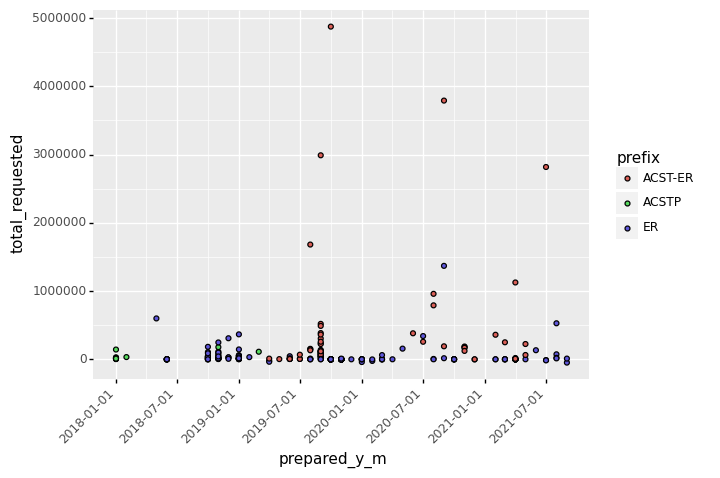

<ggplot: (8768499475911)>

In [140]:
(
    df_hc 
    >> filter(_.projectID == "32L0") 
    >> group_by(_.projectNO)
    >> ggplot(aes("prepared_y_m", "total_requested", fill="prefix")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    
)

In [141]:
(df_hc 
    >> filter(_.prefix == "ACST-ER", _.projectID=="32L0")
    >> group_by(_.project_no)
    >> count(_.prepared_y)
    >> arrange(-_.n)
)

,project_no,prepared_y,n
11,32L0(121),2019-01-01,2
20,32L0(230),2019-01-01,2
34,32L0(273),2020-01-01,2
53,32L0(326),2019-01-01,2
0,32L0(111),2019-01-01,1
1,32L0(111),2021-01-01,1
2,32L0(114),2019-01-01,1
3,32L0(115),2019-01-01,1
4,32L0(115),2020-01-01,1
5,32L0(117),2019-01-01,1


In [142]:
df_hc >> filter(_.prefix == "ACST-ER", _.project_no=="32L0(127)")

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
17844,Obligated,ACST-ER,32L0(127),Humboldt County,2020-09-10,2020-09-25,2020-09-26,2021-01-19,2021-01-20,0.00,168499.15,190330.00,Authorized,5904,1,E-76 approved on,16.00,116.00,1.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,3,2020-09-09,2020-09-24,NON-MPO,NaN,32L0,127,False,2020-09-01,2020-01-01
18767,Obligated,ACST-ER,32L0(127),Humboldt County,2021-03-29,2021-03-29,2021-03-29,2021-03-30,2021-04-01,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,0.00,1.00,2.00,NaN,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,4,2021-03-29,2021-03-29,NON-MPO,NaN,32L0,127,False,2021-03-01,2021-01-01


### Looking at Projects with 5904

In [143]:
df_hc >> filter(_.projectID == "5904")

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121,True,2018-12-01,2018-01-01
61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True,2018-11-01,2018-01-01
277,Obligated,BPMPL,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,-81905.86,0.00,-85411.69,Authorized,5904,1,E-76 approved on,0.00,4.00,1.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,2,2018-11-02,2018-11-02,NON-MPO,NaN,5904,121,True,2018-11-01,2018-01-01
278,Obligated,RPSTP,5904(143),Humboldt County,2018-07-06,2018-10-01,2018-11-06,2018-11-07,2018-11-07,550000.00,0.00,550000.00,Authorized,5904,1,E-76 approved on,102.00,37.00,0.00,BIKEPED-A,Humboldt County Between Bracut And Eureka Ajt ...,Class 1 Multi-use Trail (tc),2,2018-06-21,2018-06-21,NON-MPO,NaN,5904,143,True,2018-07-01,2018-01-01
467,Obligated,BPMPL,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,-16797.31,0.00,-17799.93,Authorized,5904,1,E-76 approved on,NaN,12.00,5.00,HBPLOCAL,"China Creek Bridge 04c0019, And Nissen Slough ...",Bridge Preventative Maintenance,2,NaT,NaT,NON-MPO,NaN,5904,135,True,2018-09-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20020,DISTRICT,ATP,5904(151),Humboldt County,2021-10-22,NaT,NaT,NaT,NaT,1358000.00,0.00,1358000.00,..,5904,1,Prepared on 10/22/2021,NaN,NaN,NaN,NaN,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaT,NaT,NON-MPO,NaN,5904,151,True,2021-10-01,2021-01-01
20021,DISTRICT,BPMPL,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaN,5904,156,True,2021-08-01,2021-01-01
20022,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaN,5904,165,True,2021-09-01,2021-01-01
20023,DISTRICT,HSIP,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,154662.00,0.00,178643.00,Hold for FTIP amendment.,5904,1,Prepared on 10/20/2021,NaN,NaN,NaN,NaN,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaT,NaT,NON-MPO,NaN,5904,181,True,2021-10-01,2021-01-01


In [144]:
df_hc >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,prepared_y_m,prepared_y
0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121,True,2018-12-01,2018-01-01
61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True,2018-11-01,2018-01-01
277,Obligated,BPMPL,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,-81905.86,0.00,-85411.69,Authorized,5904,1,E-76 approved on,0.00,4.00,1.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,2,2018-11-02,2018-11-02,NON-MPO,NaN,5904,121,True,2018-11-01,2018-01-01
467,Obligated,BPMPL,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,-16797.31,0.00,-17799.93,Authorized,5904,1,E-76 approved on,NaN,12.00,5.00,HBPLOCAL,"China Creek Bridge 04c0019, And Nissen Slough ...",Bridge Preventative Maintenance,2,NaT,NaT,NON-MPO,NaN,5904,135,True,2018-09-01,2018-01-01
468,Obligated,BPMPL,5904(139),Humboldt County,2018-08-31,2018-10-01,2018-10-10,2018-10-12,2018-10-15,-123758.02,0.00,-132486.70,Authorized,5904,1,E-76 approved on,33.00,11.00,3.00,HBPLOCAL,Holmes Flat Road Over Larabee Low Level-eel River,Bridge Preventative Maintenance,3,2018-08-29,2018-08-29,NON-MPO,NaN,5904,139,True,2018-08-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19249,Obligated,BRLS,5904(127),Humboldt County,2021-04-29,2021-05-19,2021-05-28,2021-06-01,2021-06-15,-48480.20,0.00,-46125.83,Authorized,5904,1,E-76 approved on,264.00,13.00,14.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,8,2020-08-28,2021-05-18,NON-MPO,NaN,5904,127,True,2021-04-01,2021-01-01
20019,DISTRICT,BPMPL,5904(141),Humboldt County,2021-08-11,NaT,NaT,NaT,NaT,53348.54,0.00,60260.00,Hold for FTIP amendment.,5904,1,Prepared on 8/11/2021,NaN,NaN,NaN,NaN,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaT,NaT,NON-MPO,NaN,5904,141,True,2021-08-01,2021-01-01
20021,DISTRICT,BPMPL,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaN,5904,156,True,2021-08-01,2021-01-01
20022,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaN,5904,165,True,2021-09-01,2021-01-01


In [145]:
## 88 rows of all bridge related funding obligations- appears from this small subset that HBPLOCAL is the FTIP Code, 
### yet, we have various Prefix Codes.

In [146]:
(df_hc 
    >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))
    >> count(_.project_no) >> arrange(-_.n)
)

,project_no,n
11,5904(126),7
12,5904(127),7
4,5904(113),6
5,5904(118),5
9,5904(122),5
18,5904(141),5
2,5904(092),4
8,5904(121),4
16,5904(139),4
3,5904(112),3


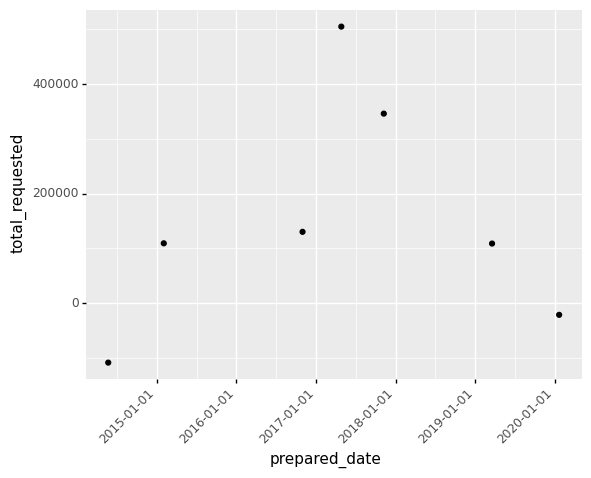

<ggplot: (8768499662888)>

In [117]:
## mplotting to see the timeline of one project 5904(126)
(df_hc 
    >> filter(_.project_no == "5904(126)")
    >> ggplot(aes("prepared_date", "total_requested")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)